In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os 
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# its important to split the training and testing - Data set is stored in the path specified. 
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("./forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("./forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
# We shall build the model here! 
# Simple CNN shall do the task, You can try other tech as well. 
# Try with other activation functions also. 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
# It is time to compile the model, let us compile. 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
# let's get the model fit. 
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)
# Epochs you can vary! 

Epoch 1/5
58/58 [==============================] - 52s 891ms/step - loss: 0.2705 - accuracy: 0.8930 - val_loss: 0.4926 - val_accuracy: 0.8824
Epoch 2/5
58/58 [==============================] - 53s 918ms/step - loss: 0.1565 - accuracy: 0.9471 - val_loss: 0.2626 - val_accuracy: 0.8824
Epoch 3/5
58/58 [==============================] - 54s 923ms/step - loss: 0.1275 - accuracy: 0.9602 - val_loss: 0.2829 - val_accuracy: 0.8824
Epoch 4/5
58/58 [==============================] - 53s 927ms/step - loss: 0.1151 - accuracy: 0.9607 - val_loss: 0.2415 - val_accuracy: 0.8824
Epoch 5/5
58/58 [==============================] - 53s 920ms/step - loss: 0.0996 - accuracy: 0.9683 - val_loss: 0.2648 - val_accuracy: 0.9265


In [7]:
# Can we work on the testing dataset, the predictions happen here. 
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 126ms/step


In [8]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [9]:

print(len(predictions))

68


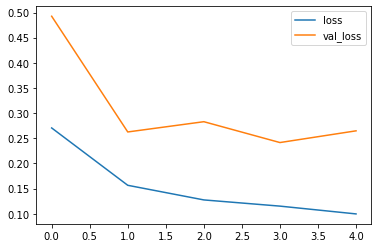

In [10]:
# it's time to plot it! Lets plot loss. 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

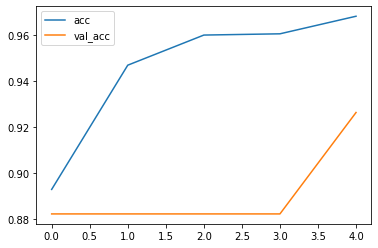

In [11]:
# How much accurate it is? 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
# This helps in taking individual images from the Dataset, load and check results. 
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 224ms/step
[[0.]]


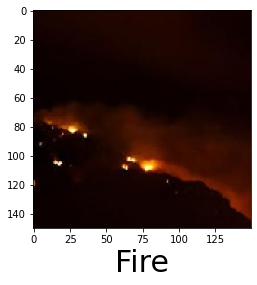

In [13]:
predictImage("./forest_fire/Testing/fire/abc172.jpg")

1/1 [==============================] - 0s 58ms/step
[[0.]]


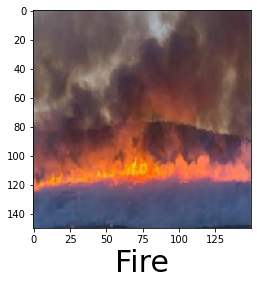

In [14]:
predictImage("./forest_fire/Testing/fire/abc178.jpg")

1/1 [==============================] - 0s 56ms/step
[[1.]]


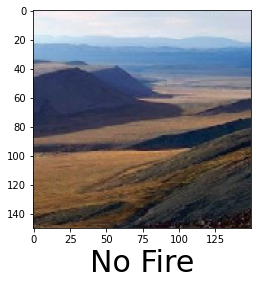

In [15]:
predictImage('./forest_fire/Testing/nofire/abc347.jpg')

1/1 [==============================] - 0s 62ms/step
[[1.]]


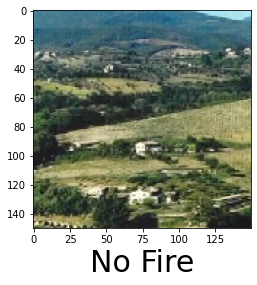

In [16]:

predictImage('./forest_fire/Testing/nofire/abc364.jpg')

1/1 [==============================] - 0s 60ms/step
[[0.]]


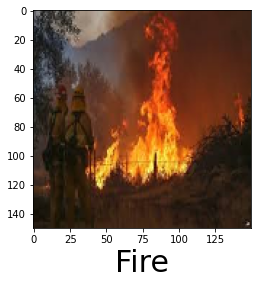

In [17]:
predictImage('./forest_fire/fire.png')

1/1 [==============================] - 0s 57ms/step
[[1.]]


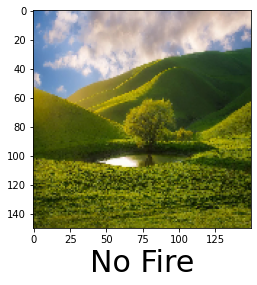

In [18]:
predictImage('./forest_fire/nfire.png')

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image

# Create a function to get the predicted label for a selected image
def predict_image(filename):
    img1 = image.load_img(filename, target_size=(150,150))
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    return 'No Fire' if val == 1 else 'Fire'

# Create a function to open a file dialog and select an image file
def select_image():
    filename = filedialog.askopenfilename(initialdir='/', title='Select Image',
                                          filetypes=(('JPEG', '*.jpg'), ('PNG', '*.png')))
    if filename:
        # Clear the current label and image
        label.config(text='')
        img_label.config(image=None)
        # Load and display the selected image
        img = Image.open(filename)
        img = img.resize((250, 250), Image.ANTIALIAS)
        img_tk = ImageTk.PhotoImage(img)
        img_label.config(image=img_tk)
        img_label.image = img_tk
        # Get the predicted label and display it
        predicted_label = predict_image(filename)
        label.config(text=predicted_label)

# Create a GUI window
root = tk.Tk()
root.geometry("500x500")
root.title('Fire Detection')

# Create a button to select an image
button = tk.Button(root, text='Select Image', command=select_image)
button.pack(pady=10)

# Create a label to display the predicted label
label = tk.Label(root, font=('Arial', 30))
label.pack()

# Create a label to display the selected image
img_label = tk.Label(root)
img_label.pack(pady=10)

root.mainloop()


C:\Users\KUNAL\AppData\Local\Temp\ipykernel_7464\3984837983.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((250, 250), Image.ANTIALIAS)
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_7464\3984837983.py", line 28, in select_image
    predicted_label = predict_image(filename)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_7464\3984837983.py", line 7, in predict_image
    img1 = image.load_img(filename, target_size=(150,150))
NameError: name 'image' is not defined


In [ ]:
import cv2
import threading
import playsound
import smtplib
import tkinter as tk
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from tkinter import filedialog
from PIL import ImageTk, Image

# Create a function to get the predicted label for a selected image
def predict_image(filename):
    img1 = image.load_img(filename, target_size=(150,150))
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    return 'No Fire' if val == 1 else 'Fire'

# Create a function to open a file dialog and select an image file
def select_image():
    filename = filedialog.askopenfilename(initialdir='/', title='Select Image',
                                          filetypes=(('JPEG', '*.jpg'), ('PNG', '*.png')))
    if filename:
        # Clear the current label and image
        label.config(text='')
        img_label.config(image=None)
        # Load and display the selected image
        img = Image.open(filename)
        img = img.resize((250, 250), Image.ANTIALIAS)
        img_tk = ImageTk.PhotoImage(img)
        img_label.config(image=img_tk)
        img_label.image = img_tk
        # Get the predicted label and display it
        predicted_label = predict_image(filename)
        label.config(text=predicted_label)
        
        
fire_cascade = cv2.CascadeClassifier('fire_detection_cascade_model.xml')
vid = cv2.VideoCapture(0)
runOnce = False

def play_alarm_sound_function():
    playsound.playsound('fire_alarm.mp3', True)
    print("Fire alarm end")

def send_mail_function(image):
    recipientmail = "bagdekunal96@gmail.com"
    recipientmail = recipientmail.lower()

    # Put sender email here
    sender_mail = "bagdekunal2804@gmail.com"
    password = "udiivtlgvsywzaks"
    
    try:
        # Create message container
        msg = MIMEMultipart()
        msg['From'] = sender_mail
        msg['To'] = recipientmail
        msg['Subject'] = 'Fire detected'
        
        # Add message body
        body = '''Warning: Fire accident has been reported
                Address: Rajiv Gandhi Institute Of Technology
                Juhu Versova Link Rd,
                behind HDFC Bank, Gharkul Society,
                Bharat Nagar, Versova, Andheri West,
                Mumbai, Maharashtra 400053 '''
        msg.attach(MIMEText(body, 'plain'))


        # Attach the image to the email
        img_attach = MIMEImage(image, name='fire.jpg')
        msg.attach(img_attach)

        # Create SMTP session
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(sender_mail, password)

        # Send mail
        text = msg.as_string()
        server.sendmail(sender_mail, recipientmail, text)

        # Terminate SMTP session
        server.quit()
        print("Alert mail sent successfully to {}".format(recipientmail))
    except Exception as e:
        print(e)

def start():
    global runOnce
    btn_start.config(state="disabled") # Disable the Start button to prevent multiple camera captures
    while(True):
        Alarm_Status = False
        ret, frame = vid.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fire = fire_cascade.detectMultiScale(frame, 1.2, 5)

        for (x,y,w,h) in fire:
            cv2.rectangle(frame,(x-20,y-20),(x+w+20,y+h+20),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            print("Fire alarm initiated")
            threading.Thread(target=play_alarm_sound_function).start()

            if runOnce == False:
                print("Mail send initiated")
                # Capture image and convert to bytes
                img = cv2.imencode('.jpg', frame)[1].tostring()
                threading.Thread(target=send_mail_function, args=(img,)).start()
                runOnce = True
            if runOnce == True:
                print("Mail is already sent once")
                runOnce = True

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    vid.release()
    cv2.destroyAllWindows()

# Create a GUI window
root = tk.Tk()
root.geometry("500x500")
root.title('Fire Detection System')

# Create a button to select an image
button = tk.Button(root, text='Select Image', command=select_image)
button.pack(pady=10)
button.place(x=150, y=10)

btn_start = tk.Button(root, text="Start-Live", command=start)
btn_start.pack(pady=10)
btn_start.place(x=250, y=10)

# Create a label to display the predicted label
label = tk.Label(root, font=('Arial', 30))
label.pack()
label.place(x=200, y=400)

# Create a label to display the selected image
img_label = tk.Label(root)
img_label.pack(pady=10)
img_label.place(x=100, y=60)

root.mainloop()


1/1 [==============================] - 0s 29ms/step


C:\Users\KUNAL\AppData\Local\Temp\ipykernel_16816\2172721088.py:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((250, 250), Image.ANTIALIAS)

    Error 263 for command:
        open fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: fire_alarm.mp3
Exception in thread Thread-43 (play_alarm_sound_function):
Traceback (most recent call last):
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_16816\2172721088.py", line 44, in play_alarm_sound_funct

Fire alarm initiated
Mail send initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once


Exception in thread Thread-47 (play_alarm_sound_function):
Traceback (most recent call last):
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_16816\2172721088.py", line 44, in play_alarm_sound_function
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\playsound.py", line 72, in _playsoundWin
    winCommand(u'open {}'.format(sound))
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\playsound.py", line 64, in winCommand
    raise PlaysoundException(exceptionMessage)
playsound.PlaysoundException: 
    Error 263 for command:
        open fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        open

Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once



    Error 263 for command:
        open fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: fire_alarm.mp3
Exception in thread Thread-51 (play_alarm_sound_function):
Traceback (most recent call last):
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_16816\2172721088.py", line 44, in play_alarm_sound_function
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\playsound.py", line 72, in _playsoundWin
    winCommand(u'open {}'.format(sound))
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-

Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once



    Error 263 for command:
        open fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: fire_alarm.mp3
Exception in thread Thread-54 (play_alarm_sound_function):
Traceback (most recent call last):
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_16816\2172721088.py", line 44, in play_alarm_sound_function
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\playsound.py", line 72, in _playsoundWin
    winCommand(u'open {}'.format(sound))
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-

Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once



    Error 263 for command:
        open fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: fire_alarm.mp3
Exception in thread Thread-60 (play_alarm_sound_function):
Traceback (most recent call last):
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\KUNAL\AppData\Local\Temp\ipykernel_16816\2172721088.py", line 44, in play_alarm_sound_function
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\playsound.py", line 72, in _playsoundWin
    winCommand(u'open {}'.format(sound))
  File "C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-

Fire alarm initiated
Mail is already sent once
Fire alarm initiated
Mail is already sent once
Alert mail sent successfully to bagdekunal96@gmail.com
Fire alarm end



    Error 263 for command:
        close fire_alarm.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: fire_alarm.mp3


Fire alarm end
1/1 [==============================] - 0s 34ms/step
